# using Prophet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
%matplotlib inline
import datetime as dt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from acquire import acquire_data
from prepare import prep_store_data
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric, plot_forecast_component

# Using store item demand
1. Predict 2018 total monthly sales for a single store and/or item by creating a model using prophet
2. Return a data frame with the month, storeid, yhat, and the confidence intervals (yhat lower, yhat upper)
3. Plot the 2018 monthly sales predictions

In [2]:
df = acquire_data()

Reading  items  from local csv
Reading  stores  from local csv
Reading  sales  from local csv
items:  (50, 6)
stores:  (10, 5)
sales:  (913000, 5)


In [3]:
df = prep_store_data(df)
df.head()

,item_id,quantity,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,...,year,quarter,month,day,hour,dayofweek,weekday,is_weekend,sale_total,diff_from_last_day
sale_date,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,...,2013,1,1,1,0,1,Tue,False,10.92,NaN
2013-01-02 00:00:00+00:00,1,11.0,2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,...,2013,1,1,2,0,2,Wed,False,9.24,-1.68
2013-01-03 00:00:00+00:00,1,14.0,3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,...,2013,1,1,3,0,3,Thu,False,11.76,2.52
2013-01-04 00:00:00+00:00,1,13.0,4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,...,2013,1,1,4,0,4,Fri,False,10.92,-0.84
2013-01-05 00:00:00+00:00,1,10.0,5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,...,2013,1,1,5,0,5,Sat,True,8.40,-2.52


# Store 1

In [5]:
store1_df = df[df['store_id']==1]
store1_df.reset_index(inplace=True)
store1_df['sale_date'] = store1_df['sale_date'].dt.strftime('%Y-%m-%d %H:%M:%S')
store1_df.head()

,sale_date,item_id,quantity,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,...,year,quarter,month,day,hour,dayofweek,weekday,is_weekend,sale_total,diff_from_last_day
0,2013-01-01 00:00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,2013,1,1,1,0,1,Tue,False,10.92,NaN
1,2013-01-02 00:00:00,1,11.0,2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,2013,1,1,2,0,2,Wed,False,9.24,-1.68
2,2013-01-03 00:00:00,1,14.0,3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,2013,1,1,3,0,3,Thu,False,11.76,2.52
3,2013-01-04 00:00:00,1,13.0,4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,2013,1,1,4,0,4,Fri,False,10.92,-0.84
4,2013-01-05 00:00:00,1,10.0,5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,...,2013,1,1,5,0,5,Sat,True,8.40,-2.52


In [6]:
store1_df['y'] = store1_df.sale_total
store1_df['ds'] = store1_df.sale_date
store1_df = store1_df.groupby(['ds'])['y'].sum().reset_index()
store1_df.head()

,ds,y
0,2013-01-01 00:00:00,7213.59
1,2013-01-02 00:00:00,6780.94
2,2013-01-03 00:00:00,7089.05
3,2013-01-04 00:00:00,7923.11
4,2013-01-05 00:00:00,8084.41


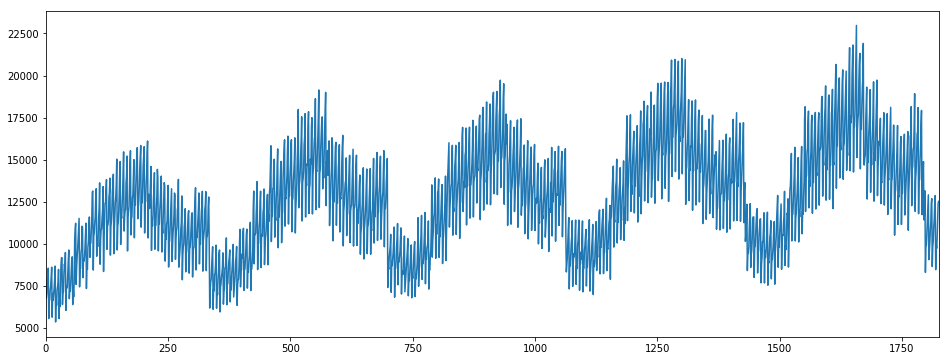

In [7]:
plt.figure(figsize=(16,6))
sns.tsplot(store1_df.y)

In [8]:
store1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 2 columns):
ds    1826 non-null object
y     1826 non-null float64
dtypes: float64(1), object(1)
memory usage: 28.6+ KB


In [9]:
m1 = Prophet(daily_seasonality=True, changepoint_range=0.9)
m1.fit(store1_df)
future_store1 = m1.make_future_dataframe(periods=180)
forecast_store1 = m1.predict(future_store1)
forecast_store1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2001,2018-06-25,14970.966504,14117.326165,15949.029004
2002,2018-06-26,16667.190933,15783.098341,17557.894078
2003,2018-06-27,16779.002879,15895.702986,17735.323590
2004,2018-06-28,17619.901199,16779.853928,18487.422659
2005,2018-06-29,18495.897948,17619.949384,19392.608493


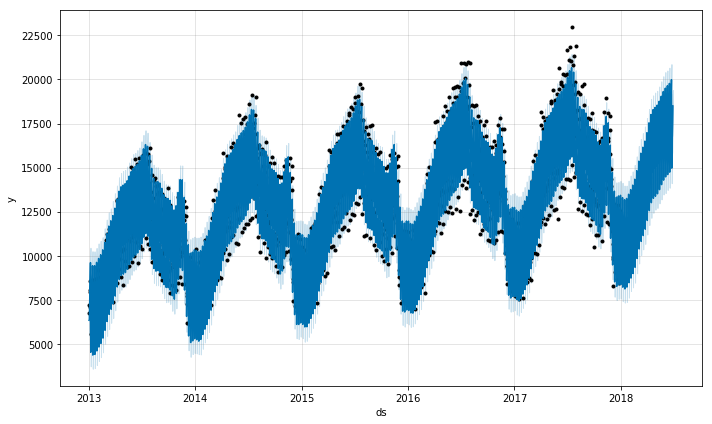

In [10]:
store1_fig1 = m1.plot(forecast_store1)

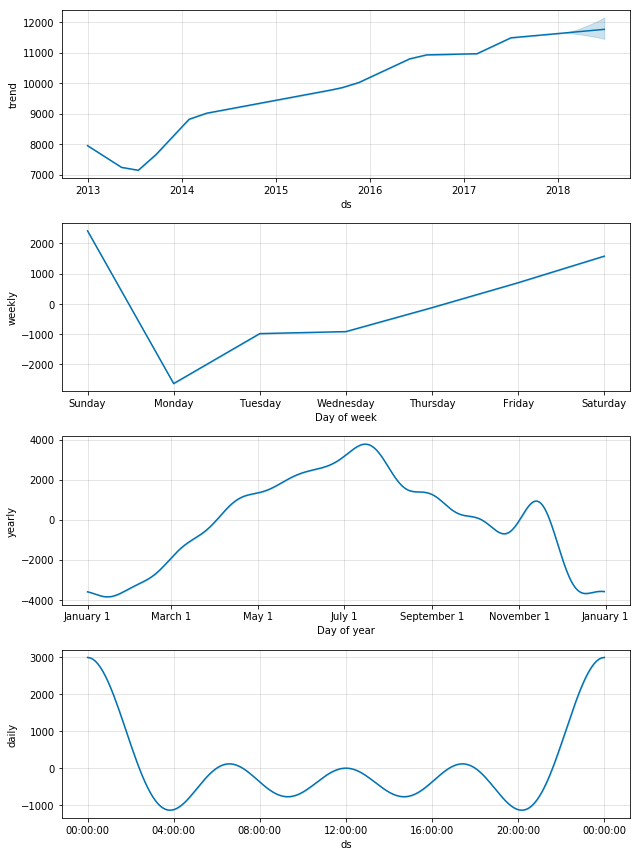

In [11]:
store1_fig2 = m1.plot_components(forecast_store1)

In [12]:
store1_cv = cross_validation(m1, horizon='90 days')

store1_pm = performance_metrics(store1_cv)
store1_pm.head(5)

INFO:fbprophet:Making 33 forecasts with cutoffs between 2013-10-23 00:00:00 and 2017-10-02 00:00:00


,horizon,mse,rmse,mae,mape,coverage
278,9 days,1.050601e+06,1024.988482,708.427619,0.062573,0.599327
1899,10 days,1.052772e+06,1026.046799,709.691531,0.062542,0.599327
369,10 days,1.053344e+06,1026.325594,710.002934,0.062550,0.599327
639,10 days,1.050458e+06,1024.918542,706.911101,0.062235,0.602694
729,10 days,1.050434e+06,1024.907031,706.642876,0.062219,0.602694


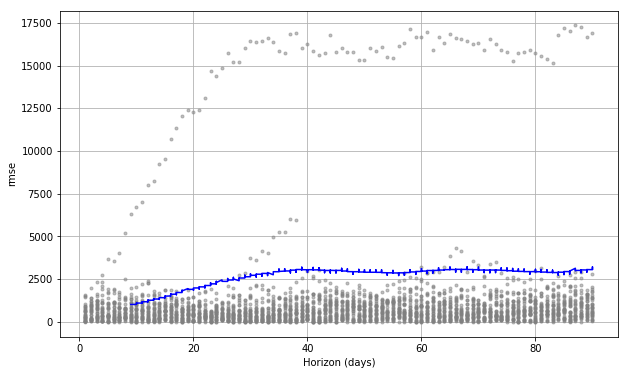

In [13]:
store1_fig3 = plot_cross_validation_metric(store1_cv, metric='rmse')

# Store 2

In [14]:
store2_df = df[df['store_id']==2]
store2_df.reset_index(inplace=True)
store2_df['sale_date'] = store2_df['sale_date'].dt.strftime('%Y-%m-%d %H:%M:%S')
store2_df['y'] = store2_df.sale_total
store2_df['ds'] = store2_df.sale_date
store2_df = store2_df.groupby(['ds'])['y'].sum().reset_index()
store2_df.head()

,ds,y
0,2013-01-01 00:00:00,9554.44
1,2013-01-02 00:00:00,9696.05
2,2013-01-03 00:00:00,10250.73
3,2013-01-04 00:00:00,10784.40
4,2013-01-05 00:00:00,11362.45


In [15]:
type(store2_df)

pandas.core.frame.DataFrame

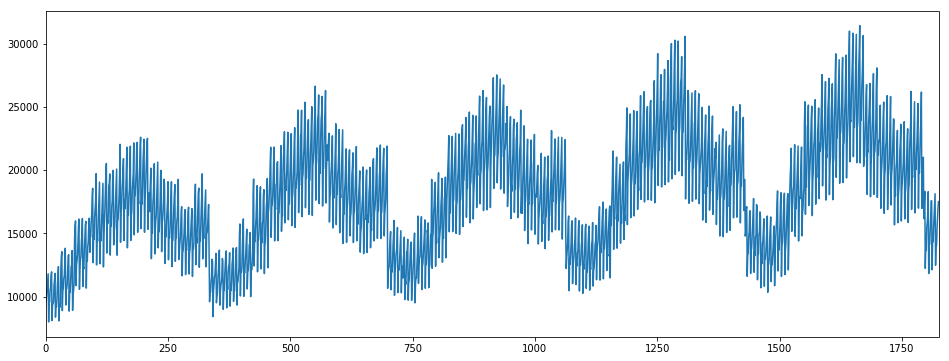

In [16]:
plt.figure(figsize=(16,6))
sns.tsplot(store2_df.y)

In [17]:
store2_df.dtypes

ds     object
y     float64
dtype: object

In [19]:
store2_df.head()

,ds,y
0,2013-01-01 00:00:00,9554.44
1,2013-01-02 00:00:00,9696.05
2,2013-01-03 00:00:00,10250.73
3,2013-01-04 00:00:00,10784.40
4,2013-01-05 00:00:00,11362.45


In [22]:
store2_df['ds'] = pd.to_datetime(store2_df['ds'])

In [24]:
store2_df.set_index('ds', inplace=True)

In [25]:
store2_df = store2_df.y.resample('M').agg('sum')

In [26]:
store2_df = store2_df.to_frame()

In [27]:
store2_df.reset_index(inplace=True)

In [28]:
store2_df.head()

,ds,y
0,2013-01-31,313859.06
1,2013-02-28,318672.05
2,2013-03-31,427780.05
3,2013-04-30,473620.81
4,2013-05-31,529055.80


In [30]:
m2 = Prophet(daily_seasonality=True, changepoint_range=0.9)
m2.fit(store2_df)
future_store2 = m2.make_future_dataframe(periods=12, freq='M')

future_store2['cap'] = 700000
future_store2['floor'] = 2000000

forecast_store2 = m2.predict(future_store2)
forecast_store2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
67,2018-08-31,738818.177360,721107.297304,756288.285019
68,2018-09-30,673553.120107,656008.054239,690534.935336
69,2018-10-31,652623.405225,634799.780062,670783.281909
70,2018-11-30,675114.894987,657794.539988,694257.440373
71,2018-12-31,524018.126316,506454.994793,542569.800986


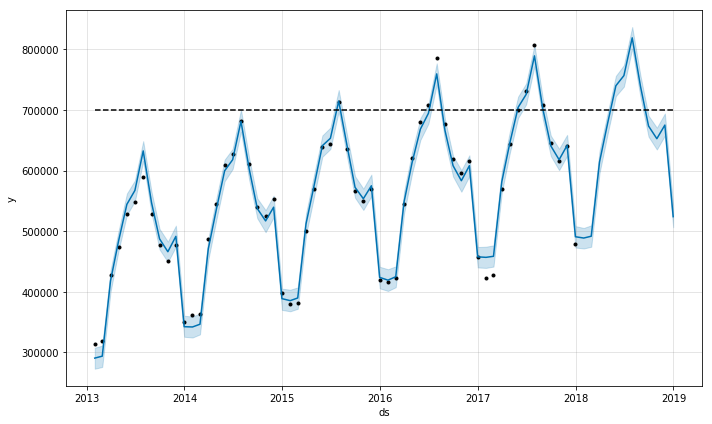

In [31]:
store2_fig1 = m2.plot(forecast_store2)

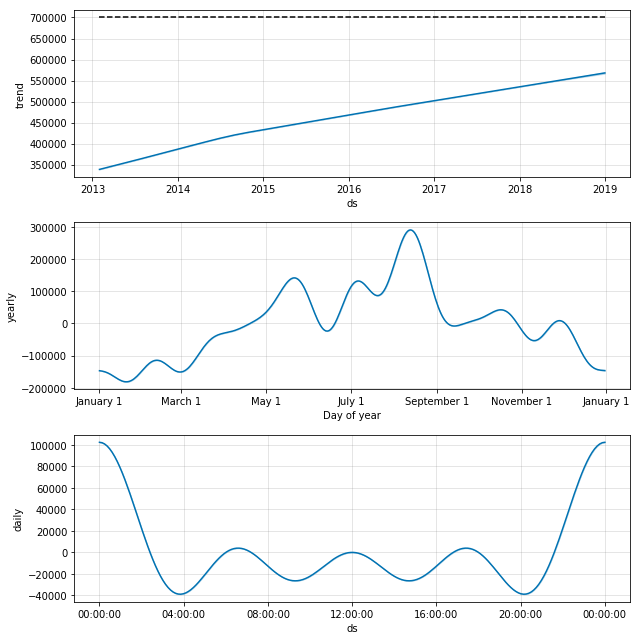

In [32]:
store2_fig2 = m2.plot_components(forecast_store2)

In [33]:
store2_cv = cross_validation(m2, horizon='90 days')

store2_pm = performance_metrics(store2_cv)
store2_pm.head(5)

INFO:fbprophet:Making 32 forecasts with cutoffs between 2013-12-07 00:00:00 and 2017-10-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 8.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 9.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 12.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 14.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 15.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 17.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 17.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 20.0.
INFO:fbprophet:n_changepoints greater than number of observations.Using 22.0.
INFO:fbprophet:n_changepoints greater than n

,horizon,mse,rmse,mae,mape,coverage
3,10 days,4.480575e+10,211673.684130,115730.030494,0.249983,0.222222
15,11 days,4.551218e+10,213335.827258,123560.935045,0.261349,0.222222
83,11 days,4.532027e+10,212885.575768,119334.924871,0.253791,0.333333
89,13 days,4.532190e+10,212889.417771,119500.576118,0.253579,0.333333
21,13 days,4.526858e+10,212764.136642,118539.931552,0.253292,0.333333


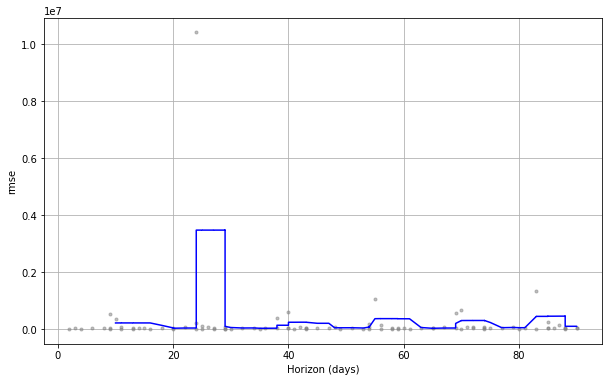

In [34]:
store2_fig3 = plot_cross_validation_metric(store2_cv, metric='rmse')

In [35]:
forecast_2018 = forecast_store2.tail(12)
forecast_2018

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
60,2018-01-31,537782.533734,700000,471458.034795,505349.672059,537763.744067,537799.771344,-49068.598421,-49068.598421,-49068.598421,102504.374047,102504.374047,102504.374047,-151572.972468,-151572.972468,-151572.972468,0.0,0.0,0.0,488713.935312
61,2018-02-28,540319.894312,700000,474313.685967,509669.082339,540232.503605,540405.206881,-48621.021791,-48621.021791,-48621.021791,102504.374047,102504.374047,102504.374047,-151125.395838,-151125.395838,-151125.395838,0.0,0.0,0.0,491698.872521
62,2018-03-31,543129.114952,700000,596047.148350,632494.423835,542938.125705,543327.659321,71192.232890,71192.232890,71192.232890,102504.374047,102504.374047,102504.374047,-31312.141156,-31312.141156,-31312.141156,0.0,0.0,0.0,614321.347842
63,2018-04-30,545847.715572,700000,660126.845727,694506.906082,545538.571843,546161.556237,131821.060371,131821.060371,131821.060371,102504.374047,102504.374047,102504.374047,29316.686324,29316.686324,29316.686324,0.0,0.0,0.0,677668.775943
64,2018-05-31,548656.936212,700000,722913.921538,756272.720569,548188.385911,549111.565714,191341.915933,191341.915933,191341.915933,102504.374047,102504.374047,102504.374047,88837.541886,88837.541886,88837.541886,0.0,0.0,0.0,739998.852145
65,2018-06-30,551375.536832,700000,738613.446926,774026.553379,550762.380835,551992.504899,205382.867443,205382.867443,205382.867443,102504.374047,102504.374047,102504.374047,102878.493397,102878.493397,102878.493397,0.0,0.0,0.0,756758.404275
66,2018-07-31,554184.757472,700000,801203.689527,836949.160029,553387.434251,555001.264098,264886.691943,264886.691943,264886.691943,102504.374047,102504.374047,102504.374047,162382.317896,162382.317896,162382.317896,0.0,0.0,0.0,819071.449415
67,2018-08-31,556993.978113,700000,721107.297304,756288.285019,555989.660256,558008.546909,181824.199247,181824.199247,181824.199247,102504.374047,102504.374047,102504.374047,79319.825201,79319.825201,79319.825201,0.0,0.0,0.0,738818.177360
68,2018-09-30,559712.578732,700000,656008.054239,690534.935336,558526.164962,560901.097848,113840.541374,113840.541374,113840.541374,102504.374047,102504.374047,102504.374047,11336.167328,11336.167328,11336.167328,0.0,0.0,0.0,673553.120107
69,2018-10-31,562521.799373,700000,634799.780062,670783.281909,561109.616726,563951.336725,90101.605852,90101.605852,90101.605852,102504.374047,102504.374047,102504.374047,-12402.768194,-12402.768194,-12402.768194,0.0,0.0,0.0,652623.405225
